## Stochastic Gradient Descent (SGD)
* **Stochastic Gradient Descent (SGD)** is a simple yet very efficient approach to fitting linear classifiers and regressors under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. 

###  Classification
* The class SGDClassifier implements a plain stochastic gradient descent learning routine which supports different loss functions and penalties for classification. Below is the decision boundary of a SGDClassifier trained with the hinge loss, equivalent to a linear SVM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [3]:
X = np.array([[0., 0],[1, 1.], [2., 3]])
X.shape # 3 samples and 2 features

(3, 2)

In [9]:
y = np.array([0, 1, 2]) # 2 features

In [5]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="hinge", penalty='l2', max_iter=5)

In [10]:
clf.fit(X, y)

C:\Users\crisp\Documents\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(max_iter=5)

In [15]:
clf.predict(np.array([[0., 1]]))

array([0])

In [19]:
clf.coef_

array([[-9.86193294, -9.86193294],
       [ 9.86193294, -9.86193294],
       [ 0.        , 19.72386588]])

In [20]:
clf.intercept_

array([  9.94019928,  -0.06876845, -39.73271926])

In [21]:
clf.decision_function([[2., 2.]])

array([[-29.50753247,  -0.06876845,  -0.2849875 ]])

### Loss functions
`loss="hinge"`: (soft-margin) linear Support Vector Machine,

`loss="modified_huber"`: smoothed hinge loss,

`loss="log"`: logistic regression,

### Penalties
`penalty="l2"`: L2 norm penalty on coef_.

`penalty="l1"`: L1 norm penalty on coef_.

`penalty="elasticnet"`: Convex combination of L2 and L1; `(1 - l1_ratio) * L2 + l1_ratio * L1.`

##  Pipelines

### Pipeline: chaining estimators
* Pipeline can be used to chain multiple estimators into one.
> [Ref](https://scikit-learn.org/stable/modules/compose.html#combining-estimators)

### Basic Usage of the pipeline
* We are going to use the pipeline in predicting the target name using iris dataset

In [26]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_X, iris_y, target_names = iris.data, iris.target, iris.target_names

In [27]:
iris_X[:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [28]:
iris_y[:2]

array([0, 0])

In [29]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, 
                                                   test_size=.25, random_state = 33)

In [32]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((112, 4), (112,), (38, 4), (38,))

### Visualisation

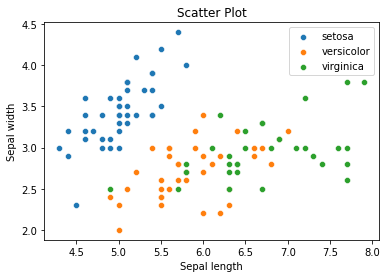

In [36]:
colors = ["red", "green", "blue"]
for i in range(len(colors)):
    xs = X_train[:,0][y_train== i]
    ys = X_train[:, 1][y_train == i]
    sns.scatterplot(x=xs, y=ys)
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.title("Scatter Plot")
plt.ylabel('Sepal width')
plt.show()

In [ ]:
# Creating a pipe

In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("clf", SGDClassifier())
])

In [39]:
pipe

Pipeline(steps=[('scale', StandardScaler()), ('clf', SGDClassifier())])

In [41]:
pipe.fit(X_train, y_train)


Pipeline(steps=[('scale', StandardScaler()), ('clf', SGDClassifier())])

In [42]:
pipe.predict([[5.1, 3.5, 1.4, 0.2]])

array([0])

In [66]:
print(y_test[:10], X_test[:10])

[1 1 0 1 2 2 0 0 2 2] [[5.7 2.9 4.2 1.3]
 [6.7 3.1 4.4 1.4]
 [4.7 3.2 1.6 0.2]
 [6.5 2.8 4.6 1.5]
 [6.1 2.6 5.6 1.4]
 [6.3 3.3 6.  2.5]
 [4.8 3.4 1.9 0.2]
 [5.1 3.5 1.4 0.3]
 [6.4 3.1 5.5 1.8]
 [6.9 3.2 5.7 2.3]]


In [50]:
target_names[0]

'setosa'

In [59]:
def predictIris(data):
    index = pipe.predict([data])[0]
    return target_names[index]

In [60]:
predictIris([5.1, 3.5, 1.4, 0.2])

'setosa'

In [61]:
predictIris([5.7 ,2.9, 4.2, 1.3])

'versicolor'

In [62]:
predictIris([6.7 ,3.1, 4.4, 1.4])

'versicolor'

In [78]:
predictIris([4.7, 3.2, 1.6, 0.2])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [79]:
predictIris([6.9, 3.2, 5.7, 2.3])


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### Evaluating the Model

In [68]:
from sklearn.metrics import accuracy_score
y_train_pred = pipe.predict(X_train)

acc = accuracy_score(y_train, y_train_pred)
acc

0.9285714285714286

> The model is `93%` accuracy on the train data one of the reason is that, **maybe** the model is still memorising the data

In [70]:
y_test_pred = pipe.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.8947368421052632

> The model is `89%` accuracy on the test data, so we made it!!!

> Note that the `SGDClassifier` can take options such as the `loss` function, `penalty`, `max_iter`, etc in the pipeline for example:
  
```
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("clf", SGDClassifier(loss="hinge", max_iter=5, penalty="l2"))
])
```

In [71]:
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("clf", SGDClassifier(loss="hinge", max_iter=5, penalty="l2"))
])

###  Regression

The class **SGDRegressor** implements a plain stochastic gradient descent learning routine which supports different loss functions and penalties to fit linear regression models. SGDRegressor is well suited for regression problems with a large number of training samples `(> 10.000)`, for other problems they recommend **Ridge**, **Lasso**, or **ElasticNet**.

> Let's try to pridict the `iris_datasets` from the previous example using the **SGDRegressor**

#### Loss Functions
`loss="squared_loss"`: Ordinary least squares,

`loss="huber"`: Huber loss for robust regression,

`loss="epsilon_insensitive"`: linear Support Vector Regression.

In [72]:
X_train[:2], y_train[:2], X_test[:2], y_test[:2]

(array([[5. , 2.3, 3.3, 1. ],
        [4.9, 3.1, 1.5, 0.2]]),
 array([1, 0]),
 array([[5.7, 2.9, 4.2, 1.3],
        [6.7, 3.1, 4.4, 1.4]]),
 array([1, 1]))

In [73]:
from sklearn.linear_model import SGDRegressor

In [88]:
pipe = Pipeline([
    ("scale", StandardScaler()),
    ('clf', SGDRegressor())
])

In [89]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('clf', SGDRegressor())])

In [90]:
def predictIris(data):
    index = pipe.predict([data])
    print(index)
#     return target_names[index]

In [91]:
predictIris([6.9, 3.2, 5.7, 2.3])

[1.89578231]


In [ ]:
predictIris([4.7, 3.2, 1.6, 0.2])


In [ ]:
predictIris([6.7 ,3.1, 4.4, 1.4])


In [ ]:
predictIris([5.7 ,2.9, 4.2, 1.3])


In [ ]:
predictIris([5.1, 3.5, 1.4, 0.2])

In [ ]:
X = np.array([[0., 0], [1., 1]])
y = np.array([0, 1])


In [95]:
clf = SGDRegressor(max_iter =1000)

In [96]:
clf.fit(X, y)

SGDRegressor()

In [97]:
clf.predict([[0,0]])

array([0.15477472])

In [98]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
# Always scale the input. The most convenient way is to use a pipeline.
reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X, y)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [99]:
reg.predict([np.random.rand(5)])

array([0.5078794])